In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("Datasets/heights_2.csv")
df.sample(5)

,gender,height
9978,Female,57.375759
9258,Female,61.130645
5184,Female,63.617815
9457,Female,62.395824
4920,Male,66.141613


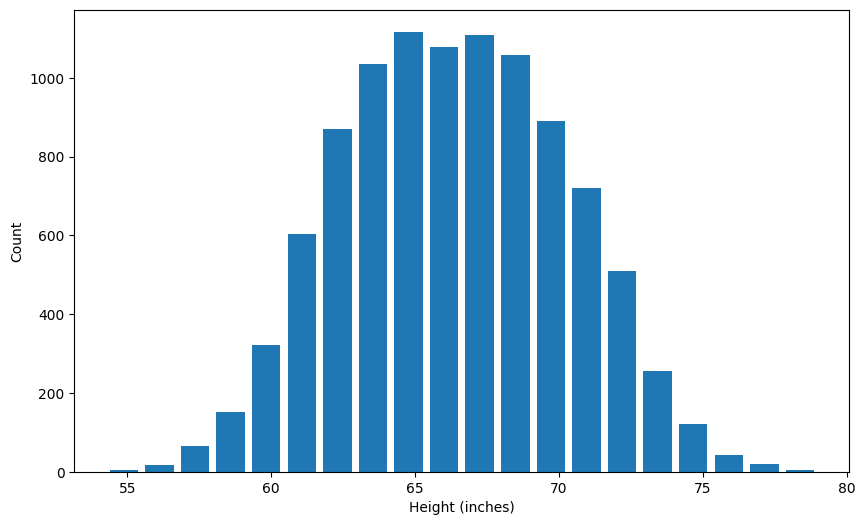

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

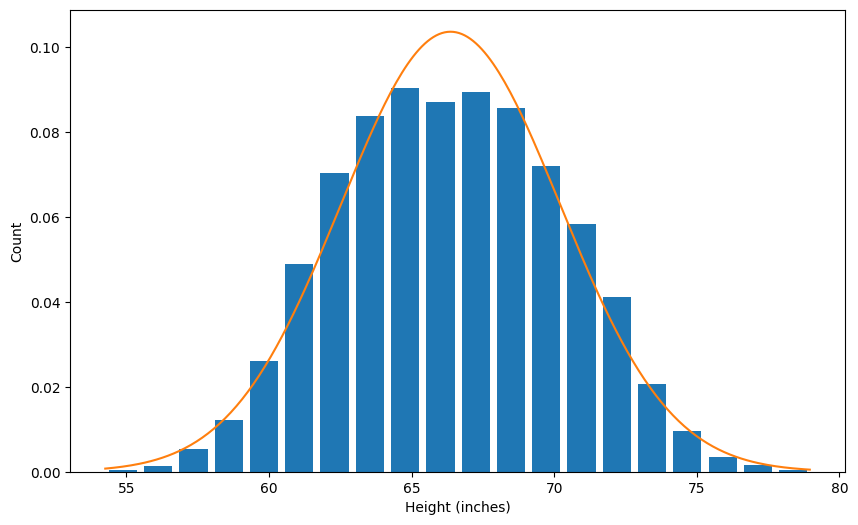

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [6]:
df.height.mean()

np.float64(66.367559754866)

In [7]:
df.height.std()

np.float64(3.847528120795573)

## (1) Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [8]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

np.float64(77.91014411725271)

In [9]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

np.float64(54.824975392479274)

In [10]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [11]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
df_no_outlier_std_dev.shape

(9993, 2)

In [13]:
df.shape

(10000, 2)

### (2) Outlier detection and removal using Z Score
**Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)
Calculate the Z Score

![img](zscore.png)

In [14]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [15]:
(73.84-66.37)/3.84

1.9453124999999998

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [16]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [17]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


### Here is the list of all outliers

In [18]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


### Remove the outliers and produce new dataframe

In [19]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [20]:
df_no_outliers.shape

(9993, 3)

In [21]:
df.shape

(10000, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)